<a href="https://colab.research.google.com/github/Ishita95-harvad/Household-Energy-Consumption/blob/main/Household_Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Household Energy Consumption**
Track daily household energy usage, temperature, and peak hour consumption

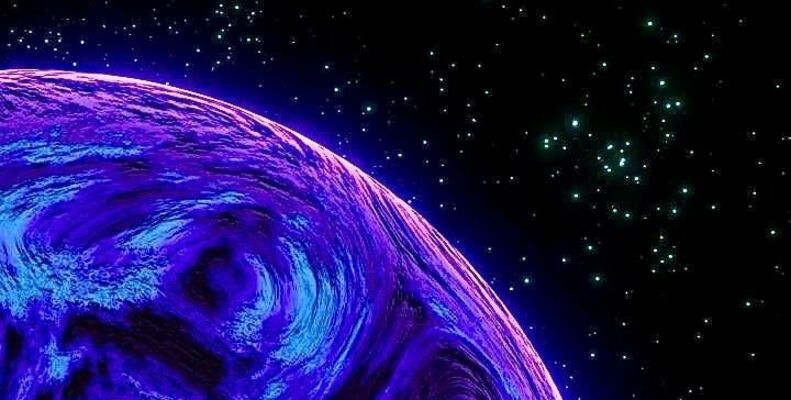

# Task
execute

Here is all the data you need:
"household_energy_consumption.csv"

## Data loading

### Subtask:
Load the "household_energy_consumption.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "household_energy_consumption.csv" file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('household_energy_consumption.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'household_energy_consumption.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Household_ID,Date,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh
0,H00001,2025-04-01,8.4,4,17.8,No,3.2
1,H00001,2025-04-02,7.9,4,17.3,No,2.8
2,H00001,2025-04-03,9.2,4,18.6,No,3.0
3,H00001,2025-04-04,7.9,4,18.2,No,2.7
4,H00001,2025-04-05,9.6,4,11.9,No,3.2


(90000, 7)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, data types of each column, and the distribution of key variables like energy consumption. Determine the overall shape of the data.


**Reasoning**:
Examine the data types, missing values, descriptive statistics, and distributions of key variables to understand the dataset.



Household_ID               object
Date                       object
Energy_Consumption_kWh    float64
Household_Size              int64
Avg_Temperature_C         float64
Has_AC                     object
Peak_Hours_Usage_kWh      float64
dtype: object
Household_ID              0
Date                      0
Energy_Consumption_kWh    0
Household_Size            0
Avg_Temperature_C         0
Has_AC                    0
Peak_Hours_Usage_kWh      0
dtype: int64
       Energy_Consumption_kWh  Household_Size  Avg_Temperature_C  \
count            90000.000000    90000.000000       90000.000000   
mean                10.571988        3.487811          17.505802   
std                  5.519494        1.709761           2.491621   
min                  0.500000        1.000000          10.000000   
25%                  6.000000        2.000000          15.800000   
50%                 10.400000        3.000000          17.500000   
75%                 14.800000        5.000000          19.20000

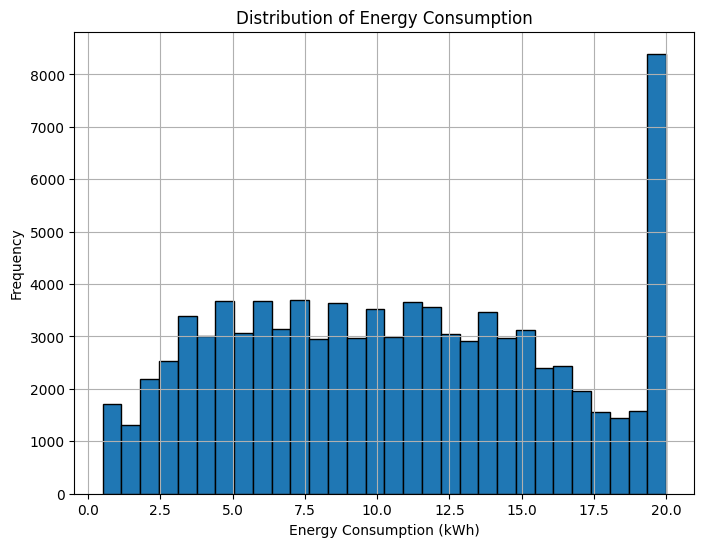

<Figure size 800x600 with 0 Axes>

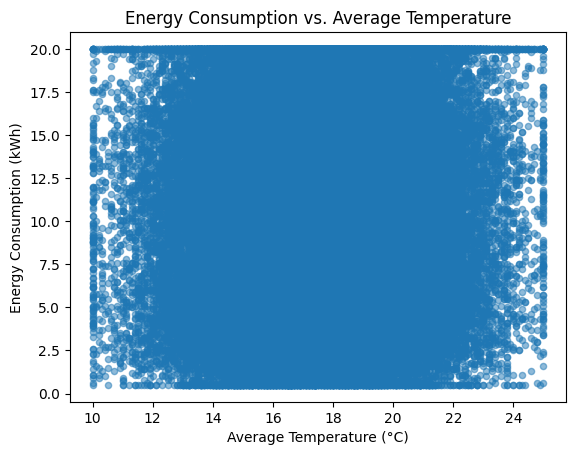

<Figure size 800x600 with 0 Axes>

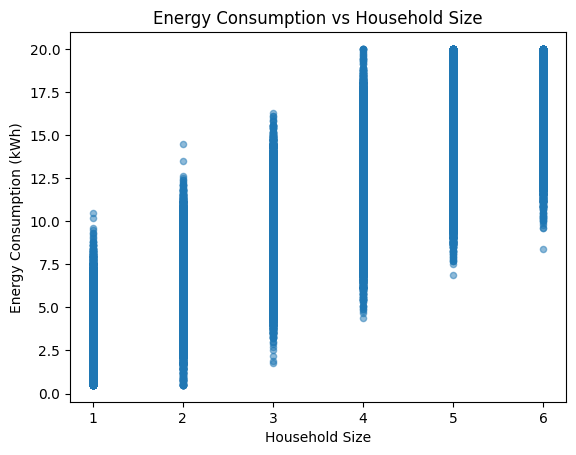

Shape of the data: (90000, 7)


In [2]:
# Check data types
print(df.dtypes)

# Identify missing values
print(df.isnull().sum())

# Summarize descriptive statistics
print(df.describe())

# Analyze the distribution of 'Energy_Consumption_kWh'
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['Energy_Consumption_kWh'].hist(bins=30, edgecolor='black')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Consumption')
plt.show()

# Explore the relationship between 'Energy_Consumption_kWh' and 'Avg_Temperature_C'
plt.figure(figsize=(8, 6))
df.plot.scatter(x='Avg_Temperature_C', y='Energy_Consumption_kWh', alpha=0.5)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption vs. Average Temperature')
plt.show()

# Explore the relationship between 'Energy_Consumption_kWh' and 'Household_Size'
plt.figure(figsize=(8,6))
df.plot.scatter(x='Household_Size', y='Energy_Consumption_kWh', alpha=0.5)
plt.xlabel('Household Size')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption vs Household Size')
plt.show()

# Report the shape of the data
print("Shape of the data:", df.shape)

## Data cleaning

### Subtask:
Clean the data by handling outliers in the 'Energy_Consumption_kWh' column and ensuring data consistency.


**Reasoning**:
Identify outliers in 'Energy_Consumption_kWh' using the IQR rule, visualize them, and create a new column with cleaned values. Also, standardize the 'Has_AC' column.



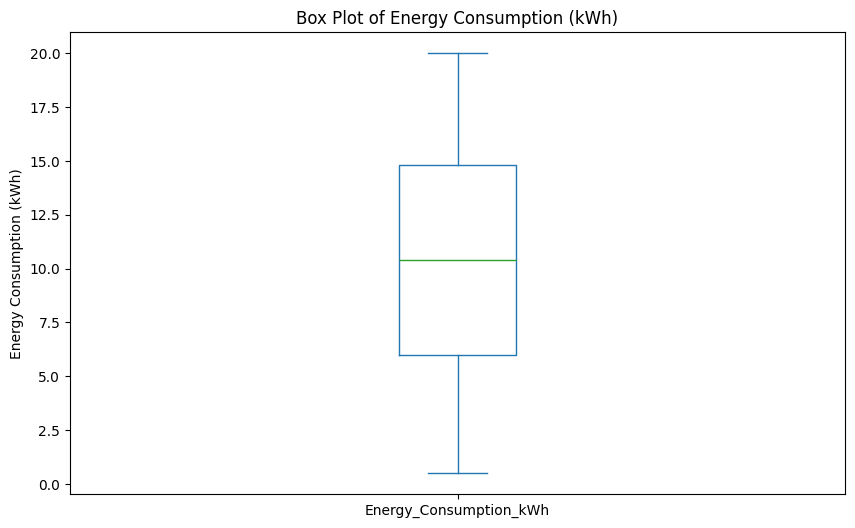

<ipython-input-3-721d09f5719d>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Has_AC_Cleaned'] = df['Has_AC_Cleaned'].replace({'no': 0, 'yes':1})


,Household_ID,Date,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh,Energy_Consumption_kWh_Cleaned,Has_AC_Cleaned
0,H00001,2025-04-01,8.4,4,17.8,No,3.2,8.4,0
1,H00001,2025-04-02,7.9,4,17.3,No,2.8,7.9,0
2,H00001,2025-04-03,9.2,4,18.6,No,3.0,9.2,0
3,H00001,2025-04-04,7.9,4,18.2,No,2.7,7.9,0
4,H00001,2025-04-05,9.6,4,11.9,No,3.2,9.6,0


In [3]:
import matplotlib.pyplot as plt

# Calculate IQR for 'Energy_Consumption_kWh'
Q1 = df['Energy_Consumption_kWh'].quantile(0.25)
Q3 = df['Energy_Consumption_kWh'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Energy_Consumption_kWh'] < lower_bound) | (df['Energy_Consumption_kWh'] > upper_bound)]

# Visualize outliers
plt.figure(figsize=(10, 6))
df['Energy_Consumption_kWh'].plot(kind='box')
plt.title('Box Plot of Energy Consumption (kWh)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

# Handle outliers by capping them at the upper and lower bounds
df['Energy_Consumption_kWh_Cleaned'] = df['Energy_Consumption_kWh'].clip(lower=lower_bound, upper=upper_bound)

# Standardize 'Has_AC' column
df['Has_AC_Cleaned'] = df['Has_AC'].str.lower()
df['Has_AC_Cleaned'] = df['Has_AC_Cleaned'].replace({'no': 0, 'yes':1})
display(df.head())

## Data wrangling

### Subtask:
Create new features from the existing data, focusing on time-based features and potentially aggregated energy consumption.


**Reasoning**:
Convert the 'Date' column to datetime objects, extract time-based features, calculate daily total energy consumption, and optionally create rolling averages.



In [4]:
import pandas as pd

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Extract time-based features
df['day_of_week'] = df['Date'].dt.dayofweek
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Define seasons based on month
def assign_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df['season'] = df['month'].apply(assign_season)

# Calculate daily total energy consumption per household
daily_consumption = df.groupby(['Household_ID', 'Date'])['Energy_Consumption_kWh_Cleaned'].sum().reset_index()
daily_consumption.rename(columns={'Energy_Consumption_kWh_Cleaned': 'Daily_Total_Energy'}, inplace=True)

# Merge daily consumption back into the original dataframe
df = pd.merge(df, daily_consumption, on=['Household_ID', 'Date'], how='left')

# Calculate 3-day rolling average of energy consumption
df['Rolling_Avg_3Day'] = df.groupby('Household_ID')['Daily_Total_Energy'].rolling(window=3, min_periods=1).mean().reset_index(0, drop=True)

# Calculate 7-day rolling average of energy consumption
df['Rolling_Avg_7Day'] = df.groupby('Household_ID')['Daily_Total_Energy'].rolling(window=7, min_periods=1).mean().reset_index(0, drop=True)

display(df.head())

,Household_ID,Date,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh,Energy_Consumption_kWh_Cleaned,Has_AC_Cleaned,day_of_week,month,year,season,Daily_Total_Energy,Rolling_Avg_3Day,Rolling_Avg_7Day
0,H00001,2025-04-01,8.4,4,17.8,No,3.2,8.4,0,1,4,2025,Spring,8.4,8.400000,8.40
1,H00001,2025-04-02,7.9,4,17.3,No,2.8,7.9,0,2,4,2025,Spring,7.9,8.150000,8.15
2,H00001,2025-04-03,9.2,4,18.6,No,3.0,9.2,0,3,4,2025,Spring,9.2,8.500000,8.50
3,H00001,2025-04-04,7.9,4,18.2,No,2.7,7.9,0,4,4,2025,Spring,7.9,8.333333,8.35
4,H00001,2025-04-05,9.6,4,11.9,No,3.2,9.6,0,5,4,2025,Spring,9.6,8.900000,8.60


## Data analysis

### Subtask:
Analyze the newly created features and their relationships with energy consumption.


**Reasoning**:
Analyze the distribution of the new time-based features and their relationships with energy consumption using visualizations and descriptive statistics.



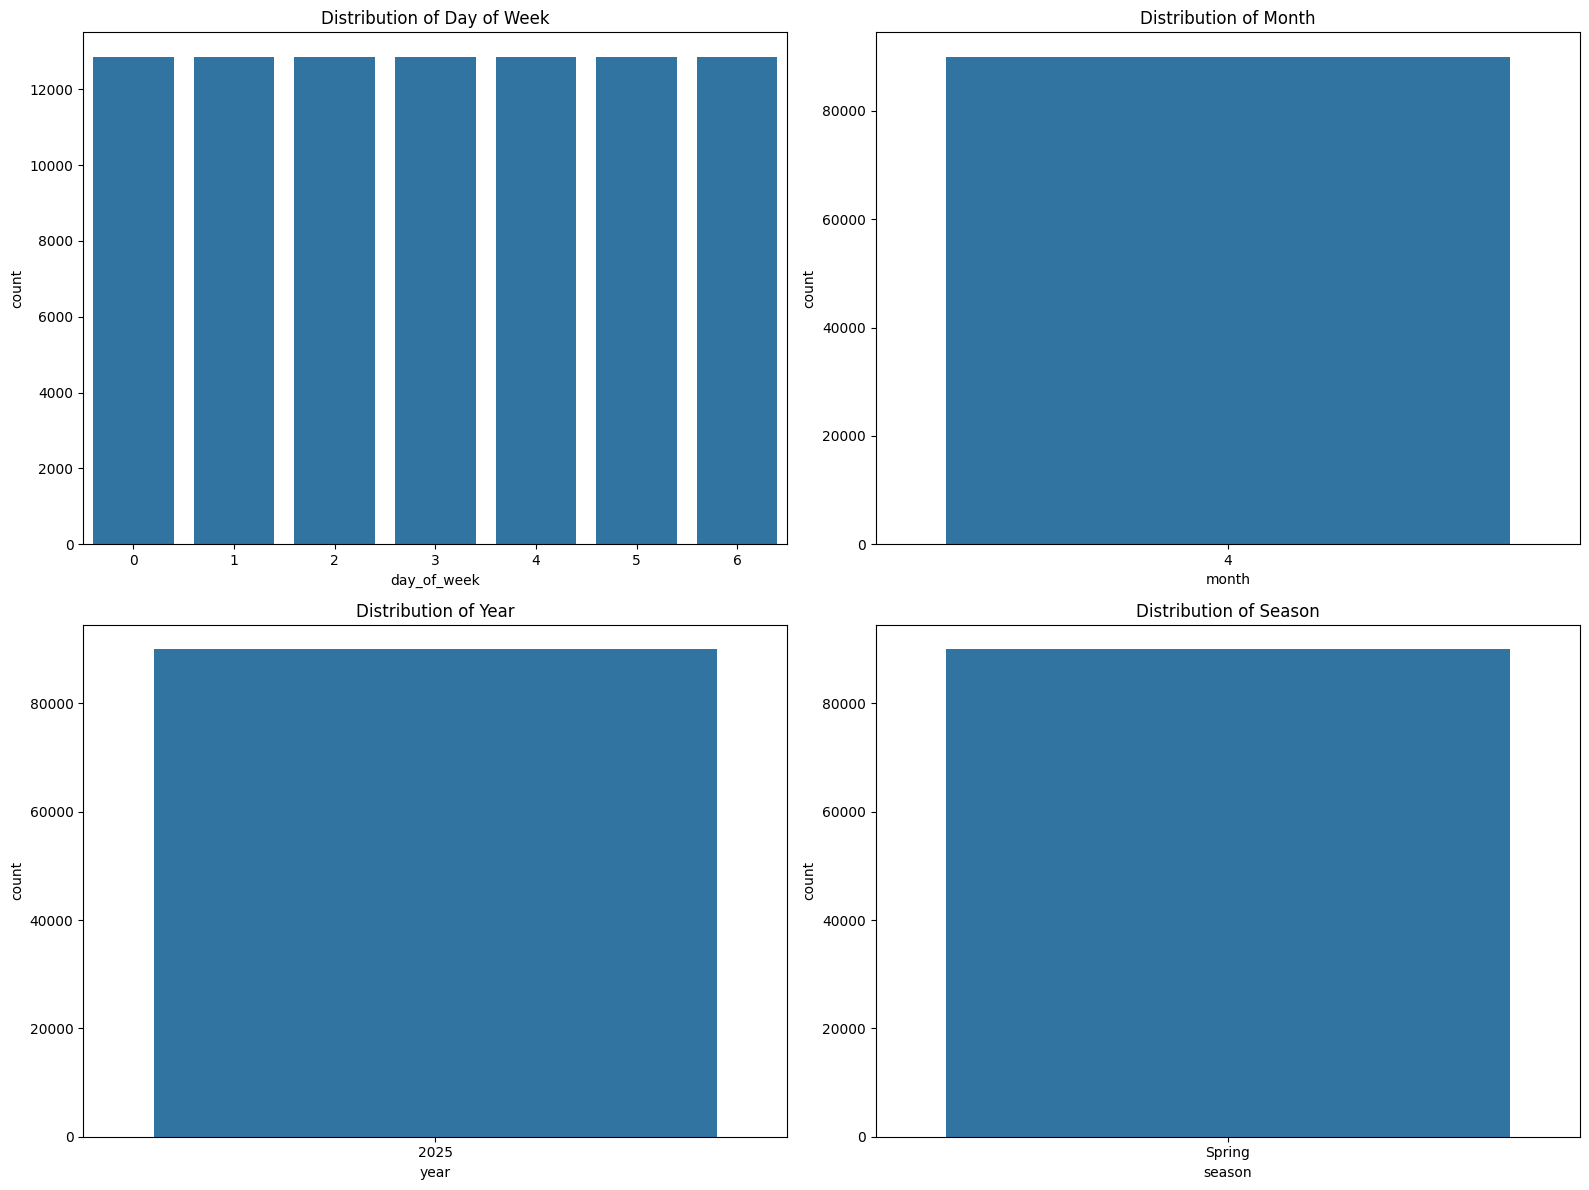

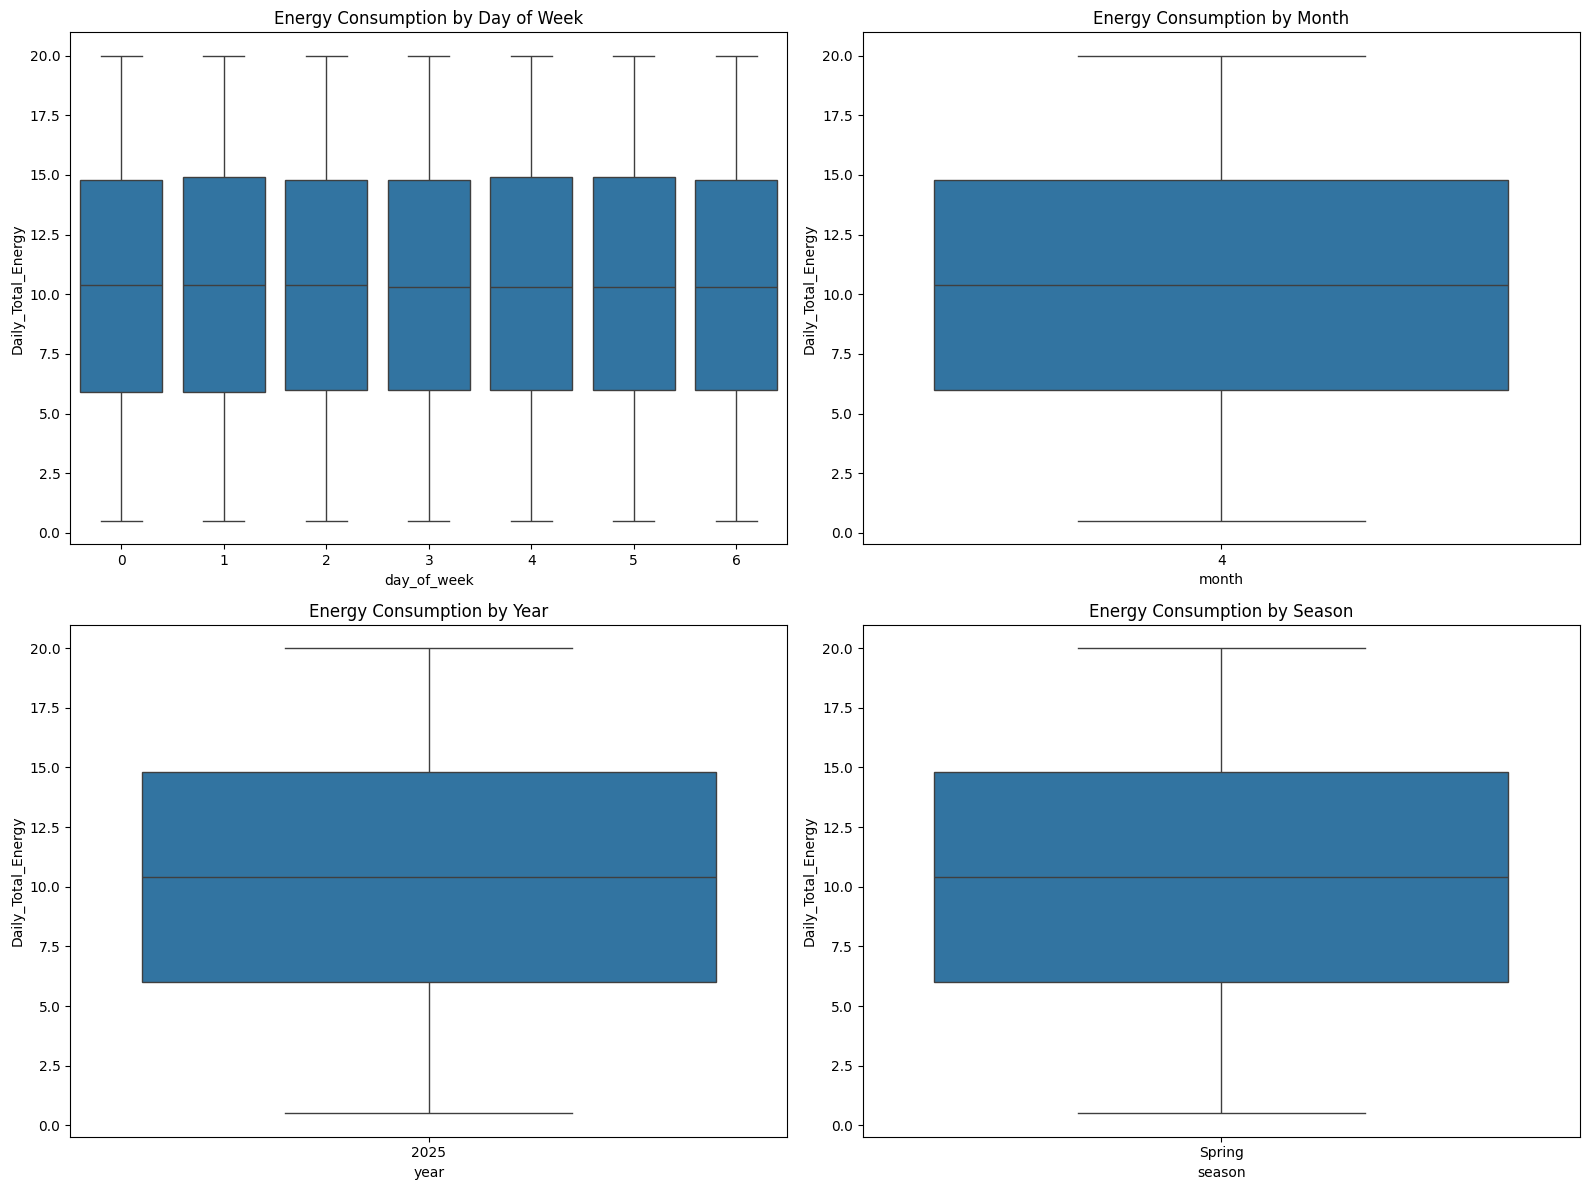

                  mean  median
day_of_week                   
0            10.574823    10.4
1            10.577547    10.4
2            10.576114    10.4
3            10.566547    10.3
4            10.580540    10.3
5            10.571992    10.3
6            10.556351    10.3
            mean  median
month                   
4      10.571988    10.4
           mean  median
year                   
2025  10.571988    10.4
             mean  median
season                   
Spring  10.571988    10.4


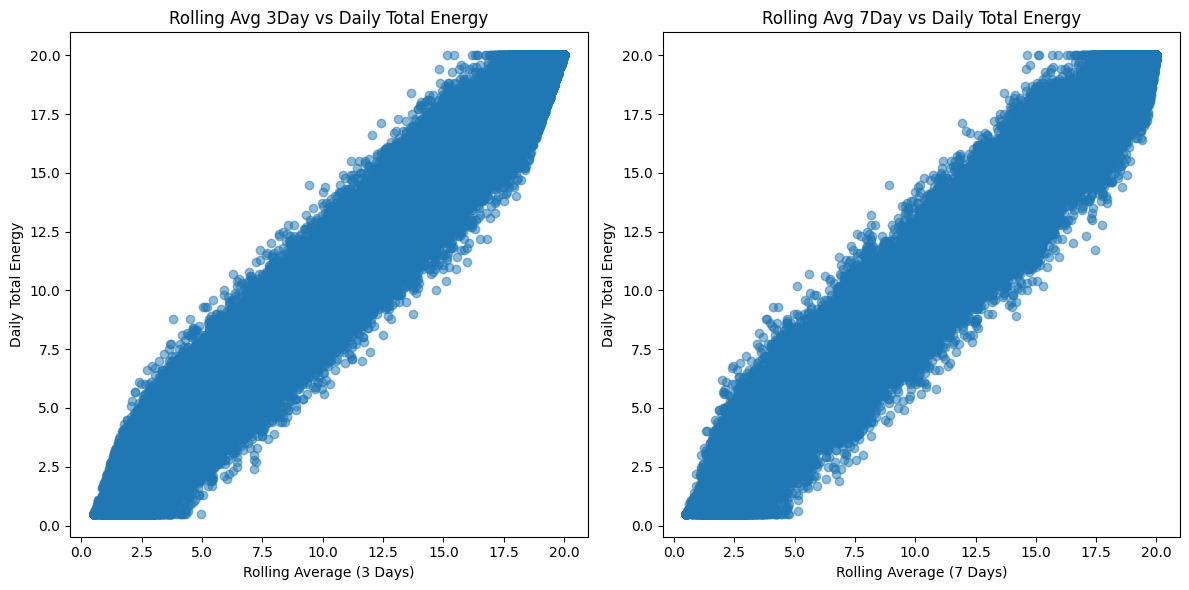

                    Rolling_Avg_3Day  Rolling_Avg_7Day  Daily_Total_Energy
Rolling_Avg_3Day            1.000000          0.997025            0.981035
Rolling_Avg_7Day            0.997025          1.000000            0.978114
Daily_Total_Energy          0.981035          0.978114            1.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of time-based features
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='day_of_week', data=df)
plt.title('Distribution of Day of Week')

plt.subplot(2, 2, 2)
sns.countplot(x='month', data=df)
plt.title('Distribution of Month')

plt.subplot(2, 2, 3)
sns.countplot(x='year', data=df)
plt.title('Distribution of Year')

plt.subplot(2, 2, 4)
sns.countplot(x='season', data=df)
plt.title('Distribution of Season')

plt.tight_layout()
plt.show()

# Investigate the relationship between daily total energy consumption and time-based features
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x='day_of_week', y='Daily_Total_Energy', data=df)
plt.title('Energy Consumption by Day of Week')

plt.subplot(2, 2, 2)
sns.boxplot(x='month', y='Daily_Total_Energy', data=df)
plt.title('Energy Consumption by Month')

plt.subplot(2, 2, 3)
sns.boxplot(x='year', y='Daily_Total_Energy', data=df)
plt.title('Energy Consumption by Year')

plt.subplot(2, 2, 4)
sns.boxplot(x='season', y='Daily_Total_Energy', data=df)
plt.title('Energy Consumption by Season')

plt.tight_layout()
plt.show()

# Calculate mean and median energy consumption for each category
print(df.groupby('day_of_week')['Daily_Total_Energy'].agg(['mean', 'median']))
print(df.groupby('month')['Daily_Total_Energy'].agg(['mean', 'median']))
print(df.groupby('year')['Daily_Total_Energy'].agg(['mean', 'median']))
print(df.groupby('season')['Daily_Total_Energy'].agg(['mean', 'median']))

# Examine the relationship between rolling average features and Daily_Total_Energy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Rolling_Avg_3Day'], df['Daily_Total_Energy'], alpha=0.5)
plt.xlabel('Rolling Average (3 Days)')
plt.ylabel('Daily Total Energy')
plt.title('Rolling Avg 3Day vs Daily Total Energy')

plt.subplot(1, 2, 2)
plt.scatter(df['Rolling_Avg_7Day'], df['Daily_Total_Energy'], alpha=0.5)
plt.xlabel('Rolling Average (7 Days)')
plt.ylabel('Daily Total Energy')
plt.title('Rolling Avg 7Day vs Daily Total Energy')

plt.tight_layout()
plt.show()

print(df[['Rolling_Avg_3Day', 'Rolling_Avg_7Day', 'Daily_Total_Energy']].corr())

**Reasoning**:
Analyze the combined effect of time-based features and other variables on energy consumption using visualizations like heatmaps and exploring variations across different household sizes within each season/month.



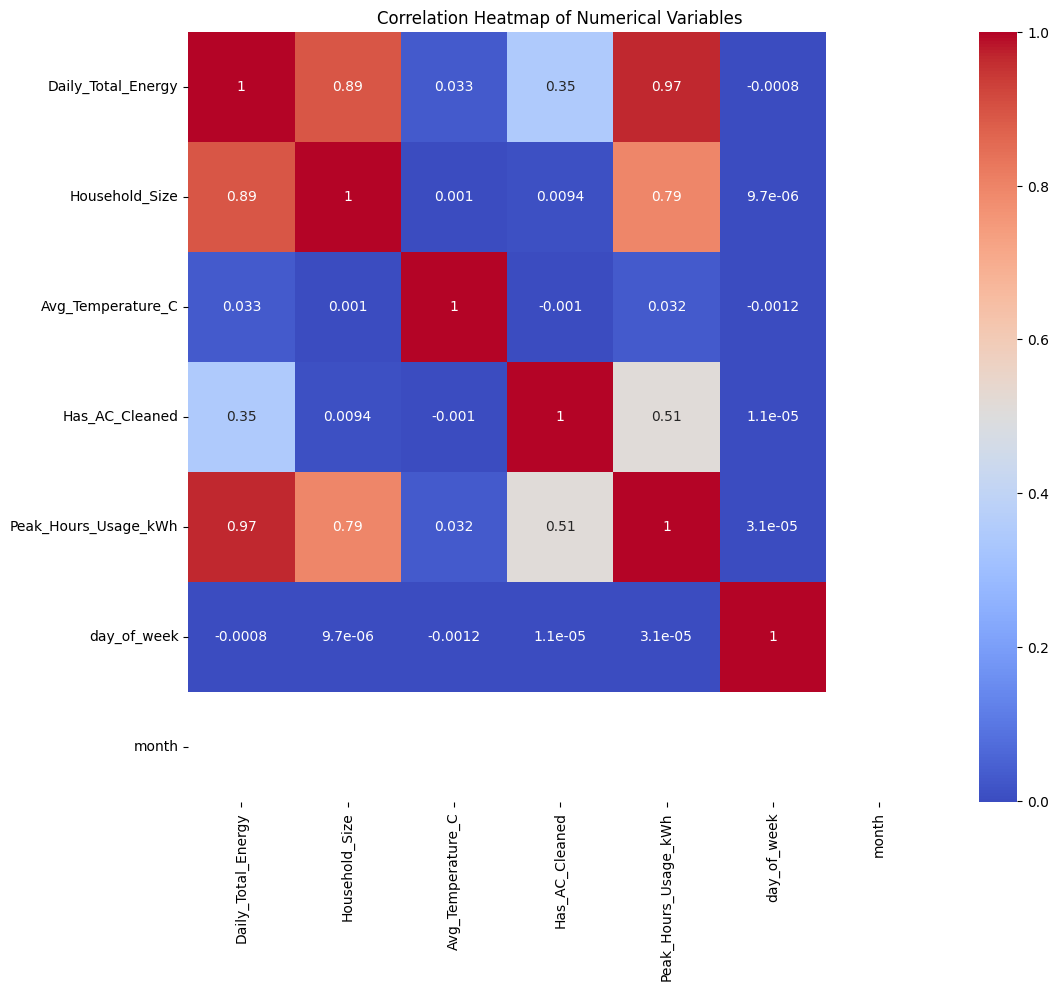

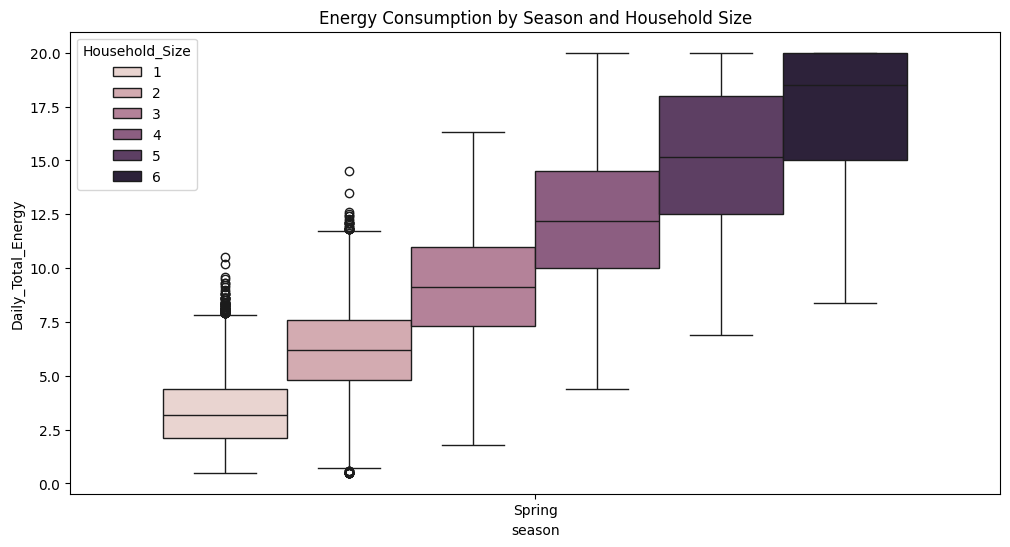

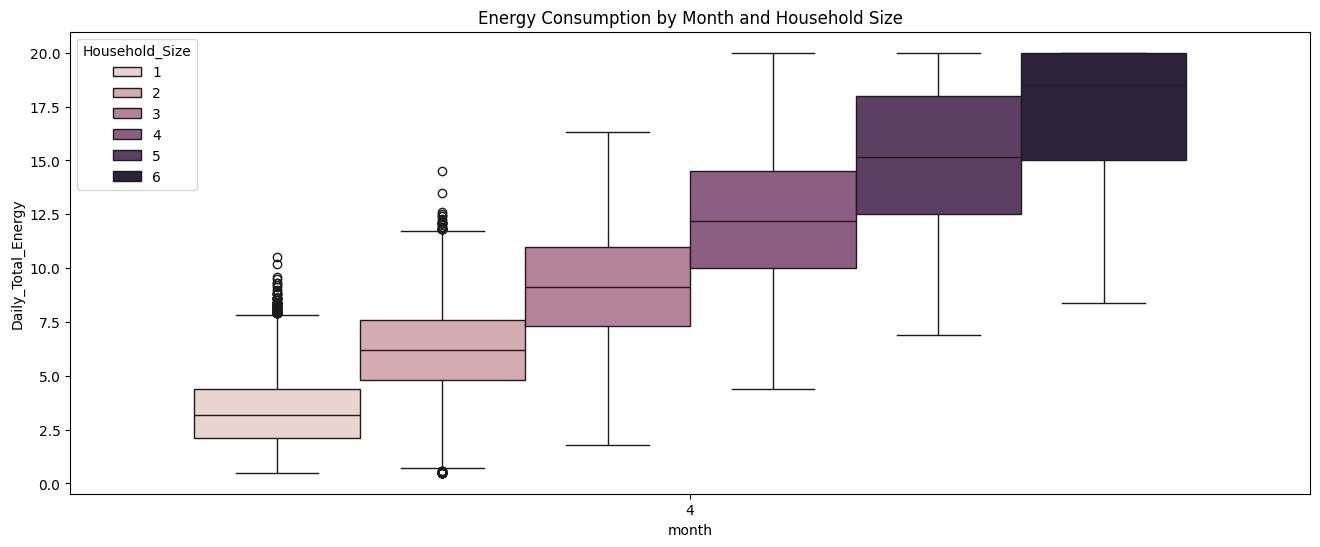

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of correlations between numerical variables
plt.figure(figsize=(12, 10))
sns.heatmap(df[['Daily_Total_Energy', 'Household_Size', 'Avg_Temperature_C', 'Has_AC_Cleaned', 'Peak_Hours_Usage_kWh', 'day_of_week', 'month']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Box plots of energy consumption by household size within each season
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='Daily_Total_Energy', hue='Household_Size', data=df)
plt.title('Energy Consumption by Season and Household Size')
plt.show()

# Box plots of energy consumption by household size within each month
plt.figure(figsize=(16, 6))
sns.boxplot(x='month', y='Daily_Total_Energy', hue='Household_Size', data=df)
plt.title('Energy Consumption by Month and Household Size')
plt.show()

## Data visualization

### Subtask:
Visualize the key relationships and trends discovered in the data analysis.


**Reasoning**:
Visualize the distribution of daily total energy consumption, the relationship between energy consumption and time-based features, trends over time, the relationship with other variables, and create a correlation heatmap.



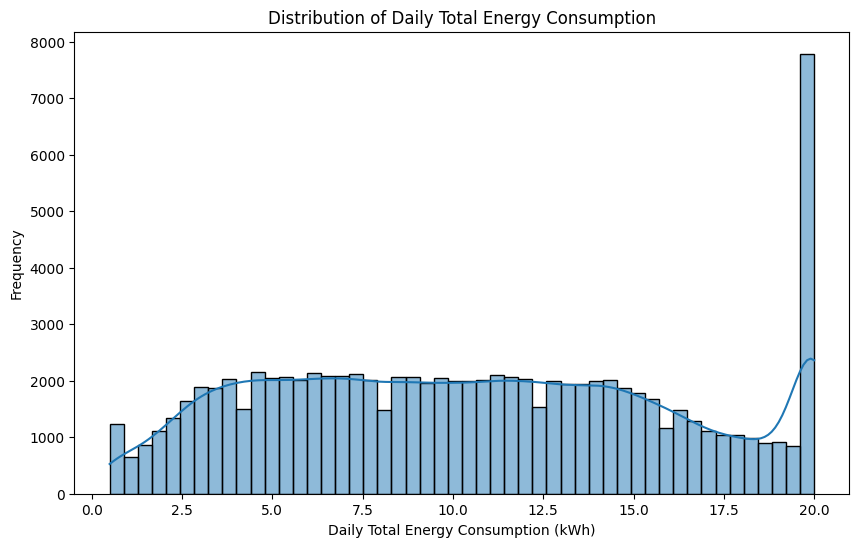

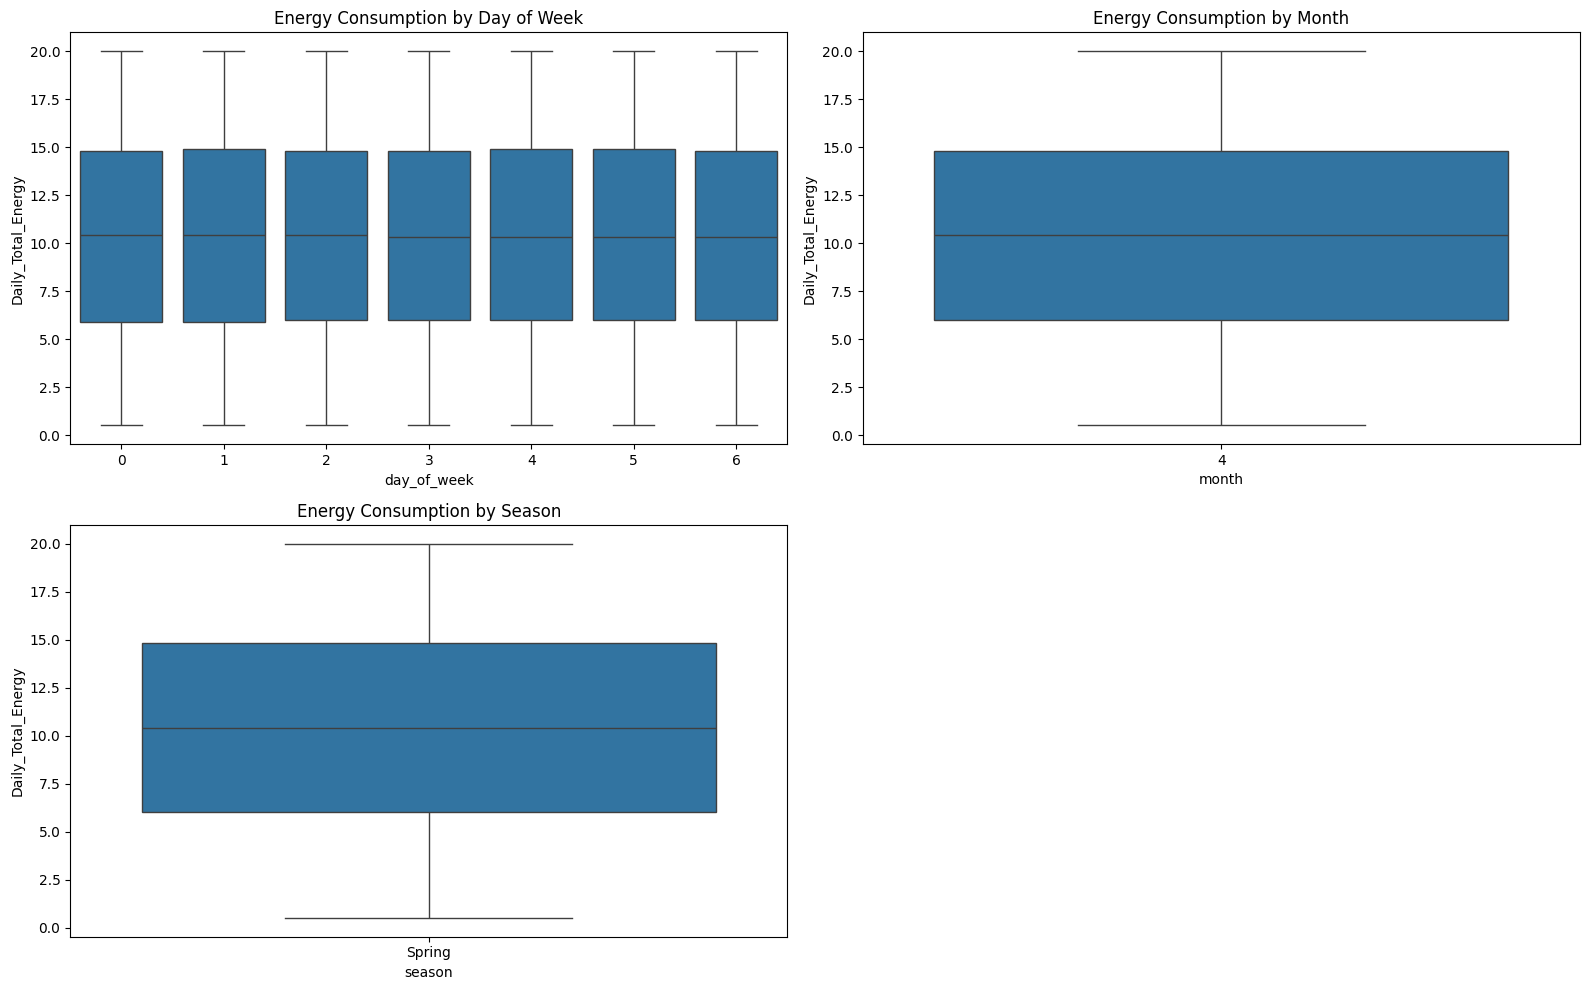

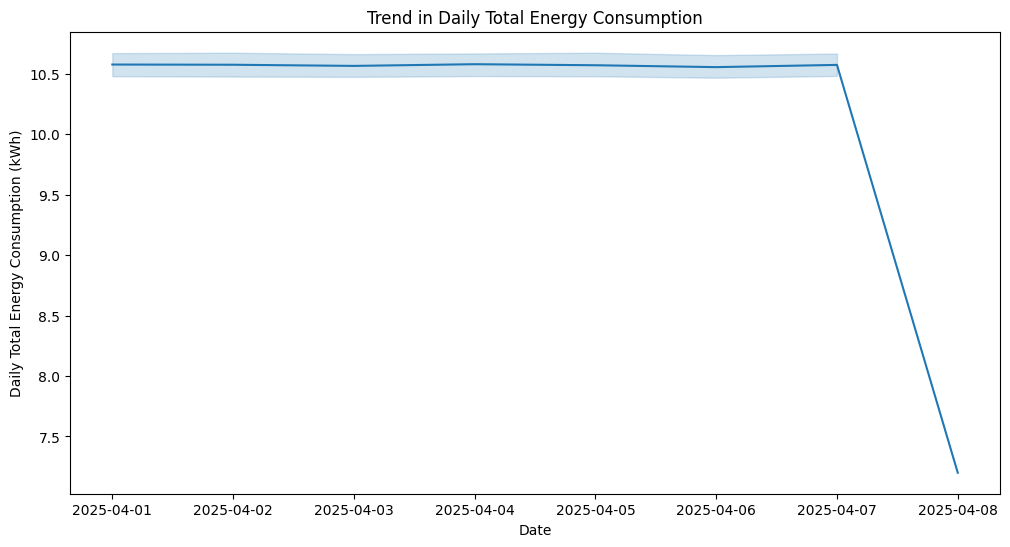

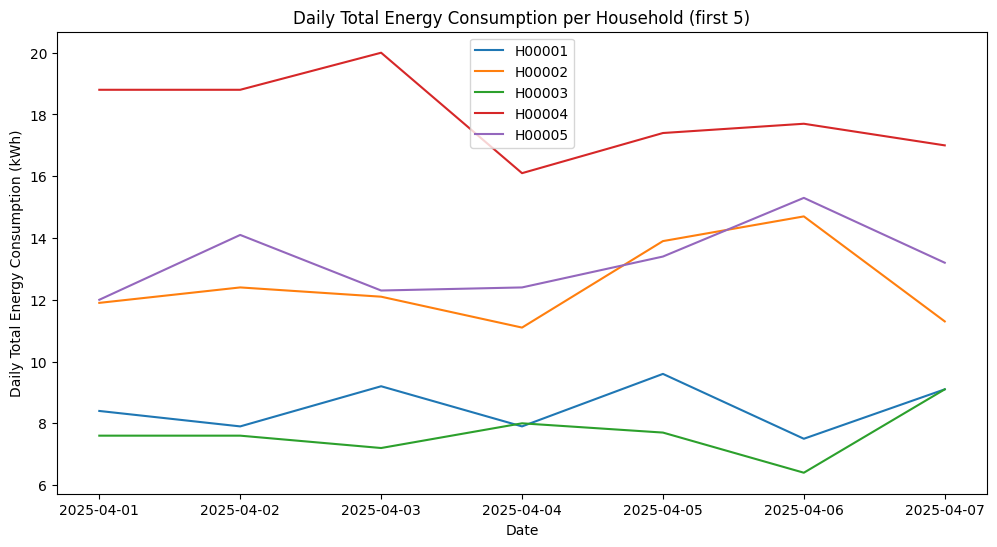

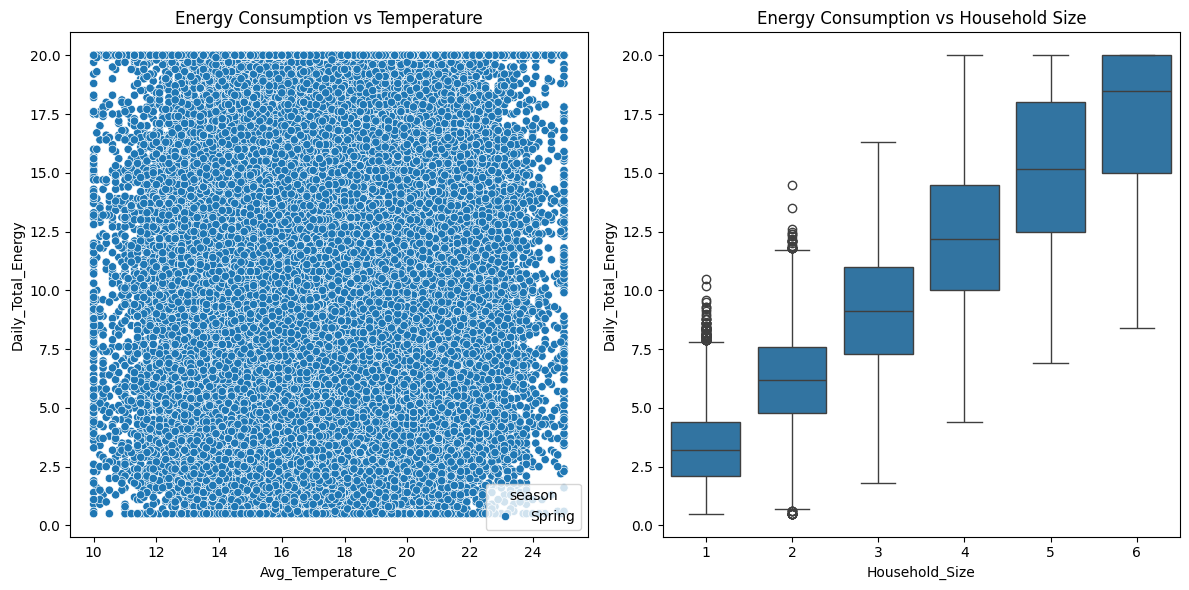

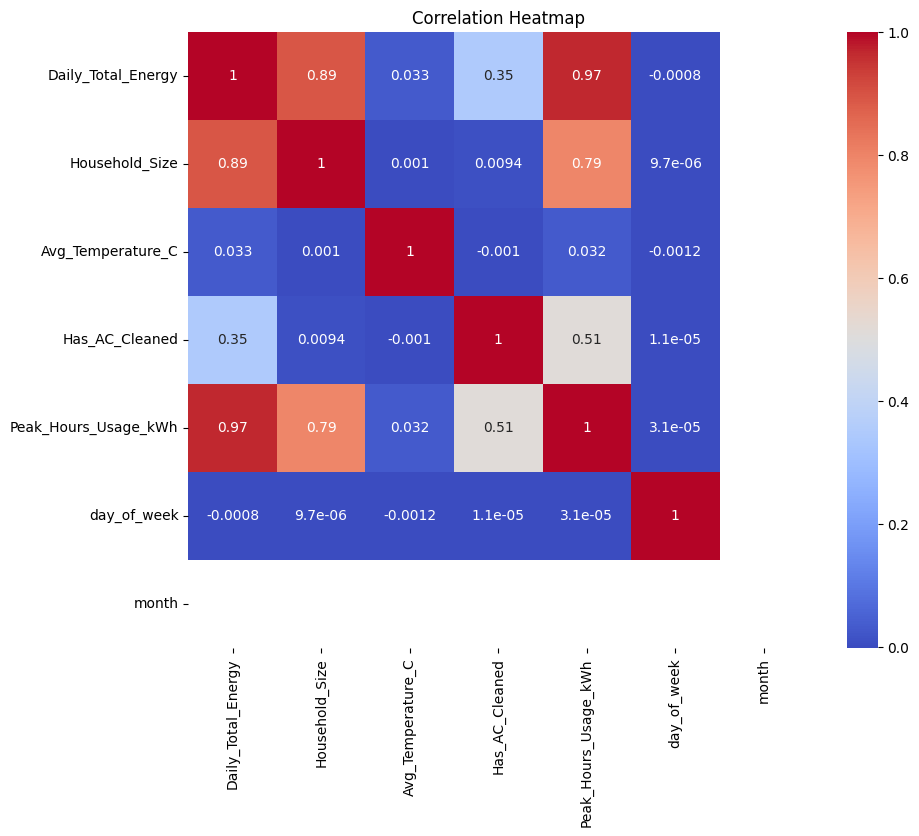

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Daily Total Energy Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Total_Energy'], kde=True)
plt.title('Distribution of Daily Total Energy Consumption')
plt.xlabel('Daily Total Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()

# 2. Relationship between Daily Total Energy Consumption and Time-Based Features
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='day_of_week', y='Daily_Total_Energy', data=df)
plt.title('Energy Consumption by Day of Week')

plt.subplot(2, 2, 2)
sns.boxplot(x='month', y='Daily_Total_Energy', data=df)
plt.title('Energy Consumption by Month')

plt.subplot(2, 2, 3)
sns.boxplot(x='season', y='Daily_Total_Energy', data=df)
plt.title('Energy Consumption by Season')

plt.tight_layout()
plt.show()


# 3. Trends in Energy Consumption Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Daily_Total_Energy', data=df)
plt.title('Trend in Daily Total Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Daily Total Energy Consumption (kWh)')
plt.show()

plt.figure(figsize=(12, 6))
for household in df['Household_ID'].unique()[:5]:  # Limit to 5 households for visibility
    subset = df[df['Household_ID'] == household]
    sns.lineplot(x='Date', y='Daily_Total_Energy', data=subset, label=household)
plt.title('Daily Total Energy Consumption per Household (first 5)')
plt.xlabel('Date')
plt.ylabel('Daily Total Energy Consumption (kWh)')
plt.legend()
plt.show()


# 4. Relationship between Energy Consumption and Other Variables
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Avg_Temperature_C', y='Daily_Total_Energy', data=df, hue='season')
plt.title('Energy Consumption vs Temperature')

plt.subplot(1, 2, 2)
sns.boxplot(x='Household_Size', y='Daily_Total_Energy', data=df)
plt.title('Energy Consumption vs Household Size')

plt.tight_layout()
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Daily_Total_Energy', 'Household_Size', 'Avg_Temperature_C', 'Has_AC_Cleaned', 'Peak_Hours_Usage_kWh', 'day_of_week', 'month']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature engineering

### Subtask:
Engineer additional features to improve model performance.


**Reasoning**:
Create lagged features for 'Daily_Total_Energy', explore feature interactions, and consider scaling numerical features.



In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Lagged Features
df['Daily_Total_Energy_Lag1'] = df.groupby('Household_ID')['Daily_Total_Energy'].shift(1)
df['Daily_Total_Energy_Lag7'] = df.groupby('Household_ID')['Daily_Total_Energy'].shift(7)
df['Daily_Total_Energy_Lag30'] = df.groupby('Household_ID')['Daily_Total_Energy'].shift(30)

# Forward fill missing values created by lagging
for col in ['Daily_Total_Energy_Lag1', 'Daily_Total_Energy_Lag7', 'Daily_Total_Energy_Lag30']:
    df[col] = df.groupby('Household_ID')[col].ffill()


# 2. Feature Interactions
df['Temp_Season_Interaction'] = df['Avg_Temperature_C'] * df['season'].map({'Spring':1,'Summer':2,'Autumn':3,'Winter':4})
df['Household_AC_Interaction'] = df['Household_Size'] * df['Has_AC_Cleaned']
df['Temperature_Squared'] = df['Avg_Temperature_C']**2


# 3. Scaling (after train-test split - placeholder for demonstration)
# In a real scenario, split your data first.
# This is a placeholder to show how scaling would be done.
scaler = MinMaxScaler()

# Example: scaling 'Avg_Temperature_C' and 'Daily_Total_Energy'
numerical_cols_to_scale = ['Avg_Temperature_C', 'Daily_Total_Energy']
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

display(df.head())

,Household_ID,Date,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh,Energy_Consumption_kWh_Cleaned,Has_AC_Cleaned,day_of_week,...,season,Daily_Total_Energy,Rolling_Avg_3Day,Rolling_Avg_7Day,Daily_Total_Energy_Lag1,Daily_Total_Energy_Lag7,Daily_Total_Energy_Lag30,Temp_Season_Interaction,Household_AC_Interaction,Temperature_Squared
0,H00001,2025-04-01,8.4,4,0.520000,No,3.2,8.4,0,1,...,Spring,0.405128,8.400000,8.40,NaN,NaN,NaN,17.8,0,316.84
1,H00001,2025-04-02,7.9,4,0.486667,No,2.8,7.9,0,2,...,Spring,0.379487,8.150000,8.15,8.4,NaN,NaN,17.3,0,299.29
2,H00001,2025-04-03,9.2,4,0.573333,No,3.0,9.2,0,3,...,Spring,0.446154,8.500000,8.50,7.9,NaN,NaN,18.6,0,345.96
3,H00001,2025-04-04,7.9,4,0.546667,No,2.7,7.9,0,4,...,Spring,0.379487,8.333333,8.35,9.2,NaN,NaN,18.2,0,331.24
4,H00001,2025-04-05,9.6,4,0.126667,No,3.2,9.6,0,5,...,Spring,0.466667,8.900000,8.60,7.9,NaN,NaN,11.9,0,141.61


## Model training

### Subtask:
Train a RandomForestRegressor model to predict 'Daily_Total_Energy'.


**Reasoning**:
Train a RandomForestRegressor model to predict 'Daily_Total_Energy'. This involves preparing features and target, splitting the data, instantiating the model, and training it.



In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Handle missing values BEFORE dropping columns
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df.groupby('Household_ID')[col].ffill()

# Convert categorical features to numerical using Label Encoding
label_encoders = {}
categorical_cols = ['season']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare features (X) and target variable (y)
X = df.drop(['Daily_Total_Energy', 'Household_ID', 'Date', 'Energy_Consumption_kWh', 'Has_AC', 'Energy_Consumption_kWh_Cleaned'], axis=1)
y = df['Daily_Total_Energy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained RandomForestRegressor model.


**Reasoning**:
Evaluate the trained RandomForestRegressor model using the test set and calculate the evaluation metrics.



In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 0.01796446077872744
Mean Squared Error (MSE): 0.0007005725917555858
Root Mean Squared Error (RMSE): 0.026468331865752058
R-squared (R2) Score: 0.9912526553626395
